# EDA
 1. Numpy tutorial
 2. Pandas tutorial
 3. Visualization

## 1. Numpy

*   Новый пункт
*   Новый пункт



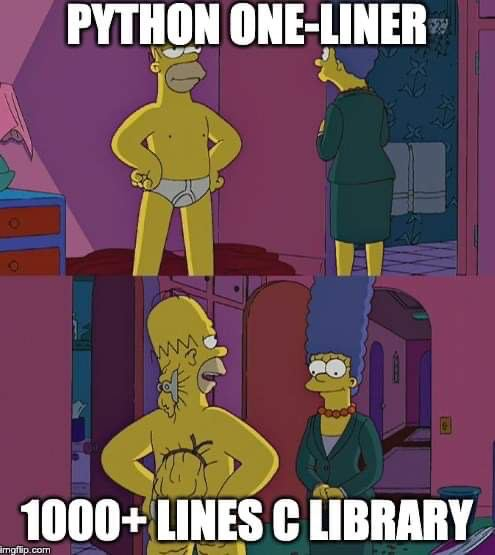

На Numpy, как и на Python, есть отличная документация с отличными туториалами (она не всегда супер-подробная, но можно почитать исходники, там, обычно, легко найти нужные детали)

https://numpy.org/learn/

Большая часть информации - переложение [этой статьи](https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d) с некоторыми углублениями и дополнениями.
### 1.1 Массивы
Кажется, самое важное, что есть в numpy - это массивы (ndarray).

Что важно про них запомнить:
* Они многомерные (могут быть почти почти любой размерности)
* В них могут лежать объекты только одного типа (за счет этого они эффективно лежат в памяти)

Numpy массивы считаются очень эффективными вычислительно:
* Опять же, потому что из-за ограничения на тип они эффективно лежат в памяти
* Под капотом Numpy сидят низкоуровневые имплементации на C, а те же самые циклы на C быстрее, чем циклы на Python по ряду причин (например, нет динамической проверки типов, косвенного обращения к указателям и т.п.)
* Операции Numpy распараллеливаются на уровне процессора (SIMD)



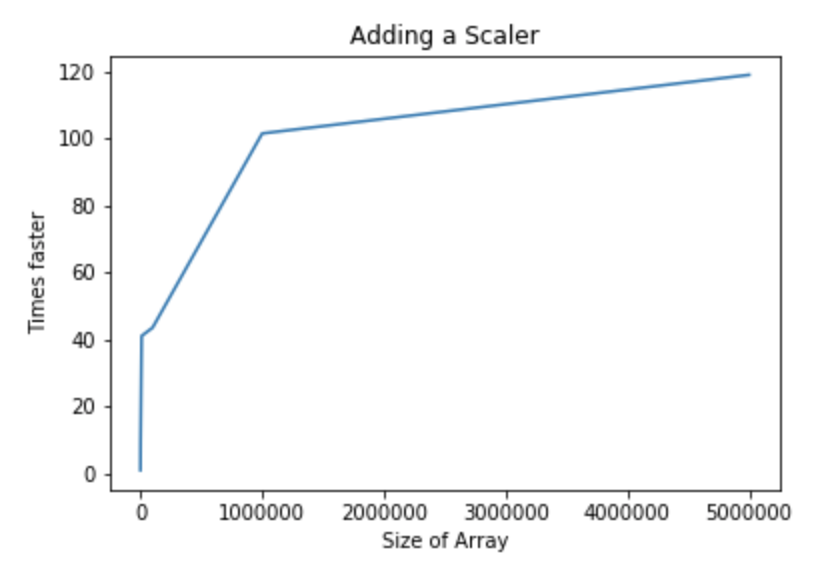

In [ ]:
import numpy as np

In [ ]:
# массив можно создать из списка
# функция автоматически определит размер (как размер списка) и тип (наиболее общий тип)
a = np.array([1,2,3,4,5])
print(a)
# функция называется array, но тип - ndarray
print(type(a))

# и даже можно создать многомерные массивы
a = np.array([[1,2,3],[4,5,6]])
print(a)

[1 2 3 4 5]
<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]


Не стоит путать функцию `array` и класс `ndarray`. Первая создает массив из списка, а второе - это на самом деле вызов констуртора класса `numpy.ndarray`, по-факту, создает массив заданого размера, заполняя его случайными элементами.

В документации Numpy не рекомендуется использовать ndarray для создания массива, поскольку есть другие функции для этого (примеры есть ниже), а ndarray - низкоуровневая штука.

In [ ]:
# создает список размерности 3, с размером [1, 2, 3]
a = np.ndarray([1,2,3])
print(a)

# можно узнать размер массива
print(a.shape)

[[[4.65652344e-310 0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000 0.00000000e+000]]]
(1, 2, 3)


In [ ]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# меняет размерность массива
a.reshape(3,5) 

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

В отличие от списков в Python, массивы имеют фиксированный тип (он же dtype). Его можно указать при создании массива.

In [ ]:
print(np.zeros((2,2), dtype=np.int64))

print(np.zeros((2,2), dtype=np.float128))


[[0 0]
 [0 0]]
[[0. 0.]
 [0. 0.]]


Использовать массив для динамического добавления в цикле не стоит

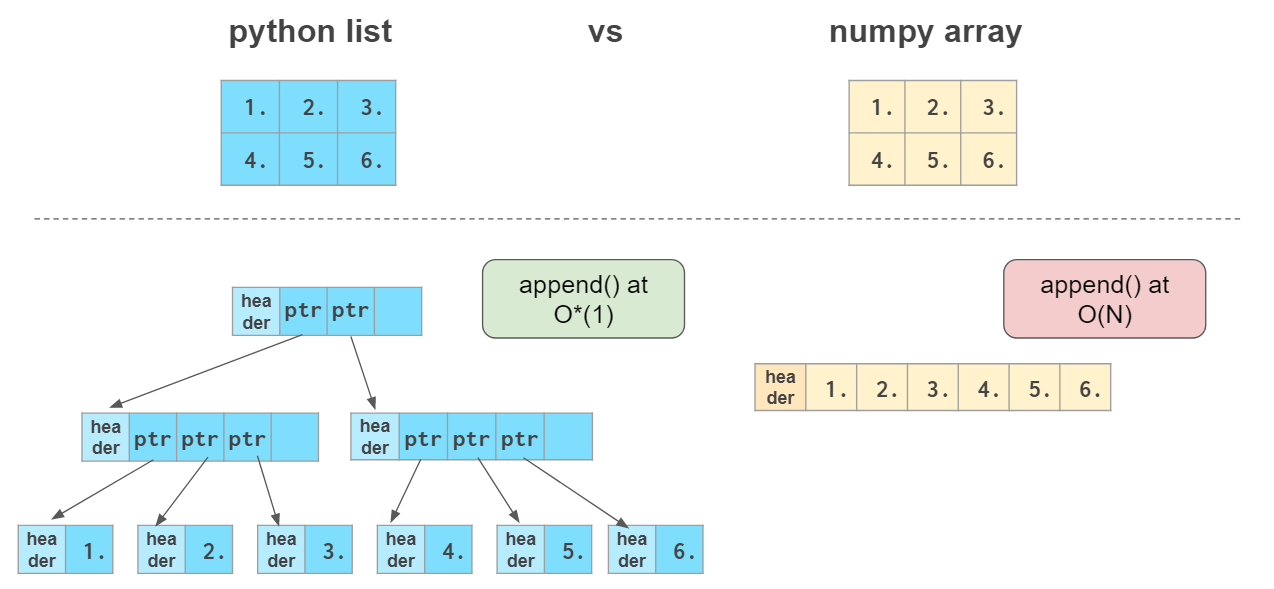

In [ ]:
# как np.ndarray, только инициализация нулями
print(np.zeros((3,1), dtype=np.float))

# похожа на np.array, создает массив из списка с таким же размером, типом, но все элементы заменяет на нули соответствующего типа
print(np.zeros_like([[1, 13, 14, 5]]))
print(np.zeros_like(['abc', 'abd']))

# есть еще похожие функции

# заполнение единицами
print(np.ones((3,1), dtype=np.float))
print(np.ones_like([[1, 13, 14, 5]]))

# просто выделение памяти без заполнения
print(np.empty((3,1), dtype=np.float))
print(np.empty_like([[1, 13, 14, 5]]))

print(np.full((3,1), 8))
print(np.full_like([[1, 13, 14, 5]], 8))

[[0.]
 [0.]
 [0.]]
[[0 0 0 0]]
['' '']
[[1.]
 [1.]
 [1.]]
[[1 1 1 1]]
[[1.]
 [1.]
 [1.]]
[[ 1 13 14  5]]
[[8]
 [8]
 [8]]
[[8 8 8 8]]


In [ ]:
# можно создать монотонную последовательность с заданным шагом
print(np.arange(start=10, stop=20, step=3))
# или с заданным количеством элементов
print(np.linspace(start=2, stop=45, num=14))

# не рекомендуется использовать np.arange с шагом типа float
print(np.arange(start=0.4, stop=0.8, step=0.1)) # 0.8 не включено
print(np.arange(start=0.5, stop=0.8, step=0.1)) # 0.8 включено
# для дробных шагов лучше использоват linspace
print(np.linspace(start=0.4, stop=0.8, num=5))

[10 13 16 19]
[ 2.          5.30769231  8.61538462 11.92307692 15.23076923 18.53846154
 21.84615385 25.15384615 28.46153846 31.76923077 35.07692308 38.38461538
 41.69230769 45.        ]
[0.4 0.5 0.6 0.7]
[0.5 0.6 0.7 0.8]
[0.4 0.5 0.6 0.7 0.8]


## 1.2 Индексы массивов

Массивы `np.ndarray` поддерживают привычную индексацию, как в списках. Объект, который возвращает обращение по индексу, называется **view**.

**View являются мутабельными!!**.
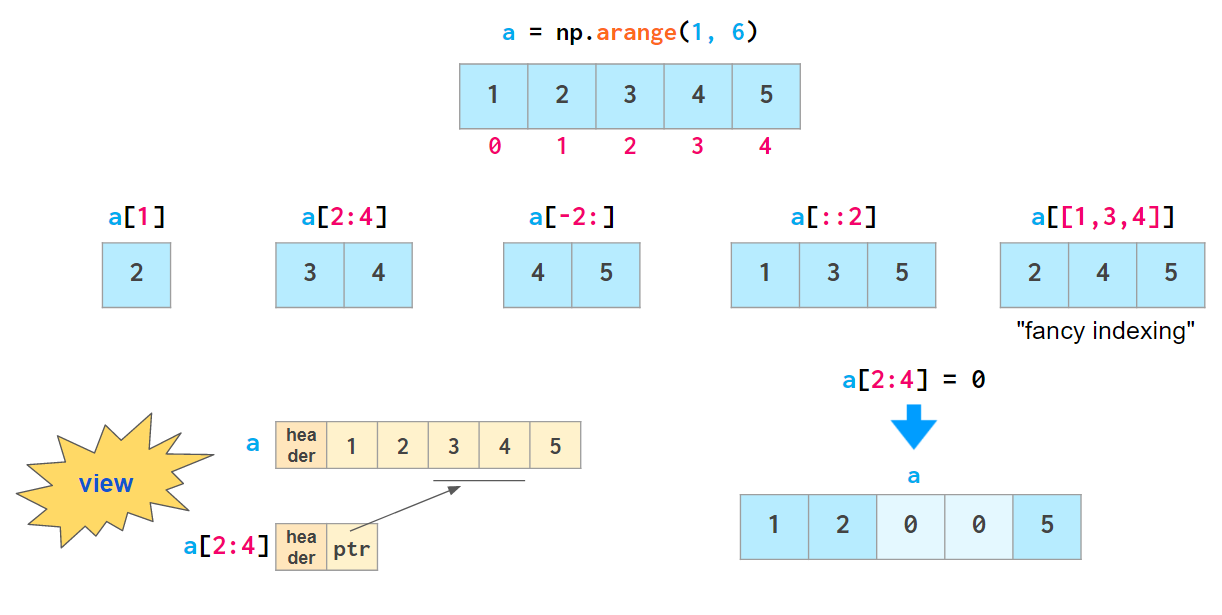


In [ ]:
a = list(range(5))
print(a)
b = a # нет копирования
c = a[:] # копирование
d = a.copy()

a[0] = 100500
print(a)
print(b)
print(c)
print(d)

[0, 1, 2, 3, 4]
[100500, 1, 2, 3, 4]
[100500, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [ ]:
a = np.arange(5)
print(a)
b = a # нет копирования
c = a[:] # НЕТ копирования, потому что это view
d = a.copy()

a[0] = 100500
print(a)
print(b)
print(c)
print(d)

[0 1 2 3 4]
[100500      1      2      3      4]
[100500      1      2      3      4]
[100500      1      2      3      4]
[0 1 2 3 4]


Numpy поддеживает булевское индексирование

In [ ]:
a = np.arange(10)
print(a > 6) # булевский np.ndarray
print(a[(a>1)&(a<6)])
print(a[1 < a < 6]) # НЕ РАБОТАЕТ, надо делать как написано строчкой вышеы

[False False False False False False False  True  True  True]
[2 3 4 5]


ValueError: ignored

Разные полезные функции

In [ ]:
np.all(a>5)

False

In [ ]:
a = np.arange(1, 10)
# проверяет, что все элементы удовлетворяют правилу
print(np.all(a>5))

# проверяет, что хотя бы 1 элемент удовлетворяют правилу
print(np.any(a>5))

# создает массив из a, приводя типы к указанному
print(a.astype(np.float))

# возвращает элементы из первого переданного массива, если они удовлетворяют условию, иначе элементы из второго, если они заданы
# если не заданы, то возвращает индексы элементов, удовлетворяющие условию
print(np.where(a < 5, a, 10*a))
print(np.where(a < 5))

# выдает индексы ненулевых элементов булевого массива
print(np.nonzero(a < 5))

# ограничивает все элементы массива минимальным и максимальным элементом
# элементы массива меньше минимального заменяются на минимум
# элементы больше максимального - на максимум
np.clip(a, 3, 6)

False
True
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 1  2  3  4 50 60 70 80 90]
(array([0, 1, 2, 3]),)
(array([0, 1, 2, 3]),)


array([3, 3, 3, 4, 5, 6, 6, 6, 6])

## 1.3 Бродкастинг
Бродкастинг (broadcast) - то, как Numpy действует в случае арифметических операций с массивами разных размеров. Можно считать, что векторные операции можно делать только с массивами одинакового размера, но бродкастинг немного расширяет эту систему.

Например, позволяет делать арифметические операции со скалярами.
![pic](https://numpy.org/devdocs/_images/broadcasting_1.svg)

Numpy довольно умный, поэтому бродкастинг довольно эффективный как по скорости, так и по памяти.

 
**Основные правила бродкастинга**:    
Бродкастинг сравнивает размерности двух массивов и он возможен, если:
1. Размеры размерности совпадают
2. Размер одной из размерностей равен 1.    

Иначе получим `ValueError: operands could not be broadcast together`.

![pic](https://numpy.org/devdocs/_images/broadcasting_2.svg)
![pic](https://numpy.org/devdocs/_images/broadcasting_4.svg)






In [ ]:
a = np.array([1,2,3])

# операции с массивами одного размера, с массивами разного размера не всегда можно
# все эти операции element-wise (то есть выполняются поэлементно, а не как, например, матричное умножение)
b = np.array([2,2,2])
print(a + b)
print(a * b)
print(a / b)
print(a // b)
print(a ** b)

[3 4 5]
[2 4 6]
[0.5 1.  1.5]
[0 1 1]
[1 4 9]


In [ ]:
a = np.array([1,2,3])

# операции с константами
# практически эквивалентно предыдущему примеру
print(a + 2)
print(a * 2)
print(a / 2)
print(a // 2)
print(a ** 2)

[3 4 5]
[2 4 6]
[0.5 1.  1.5]
[0 1 1]
[1 4 9]


In [ ]:
a = np.array([1,2,3])
b = np.array([2,3,4])

print(np.dot(a, b)) # скалярное произведение
print(np.cross(a, b)) # векторное произведение

20
[-1  2 -1]


Кроме операций с массивами, есть еще, так называемые, матричные операции.

In [ ]:
a = np.array([1,2,3]).reshape(1,3)
b = np.array([1,2,3]).reshape(3,1)

print(a)
print(b)

# матричное умножение
print(a@b)
print(b@a)

# транспонирование
c = a.T # не копируется
a[0][0] = 100
print(c)

[[1 2 3]]
[[1]
 [2]
 [3]]
[[14]]
[[1 2 3]
 [2 4 6]
 [3 6 9]]
[[100]
 [  2]
 [  3]]


In [ ]:
# еще пак полезных функций

a = np.array([0.2, 0.5, 0.7])

print(np.sqrt(a))
print(np.exp(a))
print(np.log(a))
print("\n------------\n")
print(np.sin(a))
print(np.cos(a))
print("\n------------\n")
print(np.floor(a))
print(np.ceil(a))
print(np.round(a))
print("\n------------\n")
a = np.random.uniform(0,10,(3,4)) 
print(a)
print("\n------------\n")
# можно задать размерность, по которой надо суммировать
print(a.sum())
print(a.sum(axis=0))
print(a.sum(axis=1))
print("\n------------\n")
print(a.mean()) # среднее
print(a.var()) # дисперсия
print(a.std()) # стандартное отклонение
print(a.min())
print(a.max())
print(a.argmin())
print(a.argmax())

a = np.array([0.6, 0.5, 0.7])
a.sort()
print(a)

[0.4472136  0.70710678 0.83666003]
[1.22140276 1.64872127 2.01375271]
[-1.60943791 -0.69314718 -0.35667494]

------------

[0.19866933 0.47942554 0.64421769]
[0.98006658 0.87758256 0.76484219]

------------

[0. 0. 0.]
[1. 1. 1.]
[0. 0. 1.]

------------

[[4.10773364 1.86179605 6.1823365  4.64430394]
 [7.96159802 3.25172699 9.44058951 0.2323189 ]
 [4.97763483 0.41574192 1.03889388 6.33453038]]

------------

50.44920456676866
[17.04696649  5.52926496 16.66181989 11.21115322]
[16.79617013 20.88623342 12.76680101]

------------

4.204100380564054
8.110985261007587
2.8479791538927364
0.2323188981052715
9.440589510663468
7
6
[0.5 0.6 0.7]


In [ ]:
a = np.array([1,2,3,4,3])

# поиск определенного элемента в векторе
print(np.where(a == 3)[0]) # индексы всех вхождений


a = a.astype(float)
b = np.array([1.00000001, 2., 3., 4.0001, 3.])
# сравнение двух float массивов с заданной точностью
print(np.allclose(a=a, b=b, rtol=1e-5))
print(np.allclose(a=a, b=b, rtol=1e-3))

[2 4]
False
True


In [ ]:
a = np.ones((2,2))
print(a)

# приводит массив к одномерному
print(a.flatten())

a = np.ones((4))
a.reshape(-1,1) # -1 позволяет не задавать явным образом размер, numpy сам вычислит

print("\n------------\n")

# массивы можно стакать и конкатеноривать
a = np.ones((4))
b = np.zeros((4))

print(np.hstack((a,b))) # горизонтально стакаем массивы
print(np.vstack((a,b))) # стакаем вертикально
print(np.concatenate((a,b), axis=0)) # более общая функция, конкатенирует вдоль заданной размерности

print("\n------------\n")

# можно аналогичным образом делать разделение массива
a = np.ones((3,4))
print(np.vsplit(a, [2])) # разделение по вертикали (по axis=0)
print(np.hsplit(a, [2])) # разделение по горизонтали (по axis=1)


[[1. 1.]
 [1. 1.]]
[1. 1. 1. 1.]

------------

[1. 1. 1. 1. 0. 0. 0. 0.]
[[1. 1. 1. 1.]
 [0. 0. 0. 0.]]
[1. 1. 1. 1. 0. 0. 0. 0.]

------------

[array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]]), array([[1., 1., 1., 1.]])]
[array([[1., 1.],
       [1., 1.],
       [1., 1.]]), array([[1., 1.],
       [1., 1.],
       [1., 1.]])]


## 1.4 Random

Позволяет генерить псевдослучайные числа из заданного распределения

In [ ]:
rng = np.random.default_rng() # создает новый инстанс генератора
print(rng.random(size=3)) # создает N случайных чисел из равномерного на [0,1]
print(rng.integers(low=12, high=23, size=4)) # случайные целые числа из равномерного на [low, high)s
print(rng.standard_normal(size=5)) # генерит из стандартного нормального
print(rng.normal(10, 1, size=5)) # генерит из нормального с заданным средним и ст. отклонением
print(rng.uniform(3, 10, 5)) # генерит из равномерного на [low, high)

# там еще много разных распределений

[0.69423121 0.31280682 0.06201945]
[19 13 15 12]
[-0.67961422 -0.53743101 -0.27743643 -0.12293665  0.62430922]
[10.7970276   9.23180883 10.16740148 10.52070519  9.6999656 ]
[5.75751002 9.14667522 3.07143236 4.09128333 6.07839403]


## 2. Pandas

Pandas - это один из самых удобных способов в Python работать с табличными данными. 

Основной объект в Pandas - pd.DataFrame - класс датафреймов.

Series - rласс, очень похожий на dataframe, только одномерный (одна колонка). Срез по колонке (`df['A']`) возвращает Series.

In [ ]:
import pandas as pd


In [ ]:
# можно создавать датафрейм из словаря, и других объектов
df = pd.DataFrame({
"A": 1.0,
"C": pd.Series(1, index=list(range(4)), dtype="float32"),
"E": pd.Categorical(["test", "train", "test", "train"]),
'index': "foo"})

df

,A,C,E,index
0,1.0,1.0,test,foo
1,1.0,1.0,train,foo
2,1.0,1.0,test,foo
3,1.0,1.0,train,foo


In [ ]:
df['index']

0    foo
1    foo
2    foo
3    foo
Name: index, dtype: object

In [ ]:
# основные штуки

# размер
print(df.shape)

# значения в виде ndarray
print(df.values)

# тип каждой колонки (можно задать, можно не задавать, тогда определяется автоматически)
print(df.dtypes)

# можно обращаться к колонкам как к атрибутам
print(df.A)
# можно обращаться к колонкам по имени
print(df['A'])

# список всеx колонок
print(df.columns)

# список всеx индексов. Индексы могут быть целочисленные, строковые, могут повторяться
print(df.index)

(4, 4)
[[1.0 1.0 'test' 'foo']
 [1.0 1.0 'train' 'foo']
 [1.0 1.0 'test' 'foo']
 [1.0 1.0 'train' 'foo']]
A         float64
C         float32
E        category
index      object
dtype: object
0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64
Index(['A', 'C', 'E', 'index'], dtype='object')
Int64Index([0, 1, 2, 3], dtype='int64')


In [ ]:
# очень удобно читать всякие табличные данные
# если данные в формате csv
print(pd.read_csv("penguins.csv").head(5))

# общая функция для чтения таблицы в датафрейм
df = pd.read_table("penguins.csv", sep=',')
df.head(5)

  species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    MALE
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  FEMALE
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  FEMALE
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  FEMALE

[5 rows x 7 columns]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 2.1 Работа с данными

DataFrame довольно хорошая вещь для работы с данными. Он позволяет читать данные из csv/tsv/txt и тп табличные данные, группировать их, считать основные статистики (типа среднего, ст. отклонения, медианы), делать простую визуализацию.

In [ ]:
# напечатать первые/последние N строк датафрейма
df.head(5)
df.tail(3)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
344,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
345,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
346,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [ ]:
# для каждой колонки считает основные статистики
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,345.000000,345.000000,345.000000,345.000000
mean,43.920870,17.150435,200.915942,4200.869565
std,5.483228,1.968282,14.143016,805.095490
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# можно считать отдельно каждую статистику
print(df.mean())
print('\n---------------\n')
print(df.std())

bill_length_mm         43.920870
bill_depth_mm          17.150435
flipper_length_mm     200.915942
body_mass_g          4200.869565
dtype: float64

---------------

bill_length_mm         5.483228
bill_depth_mm          1.968282
flipper_length_mm     14.143016
body_mass_g          805.095490
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f5edd8390>,
      dtype=object)

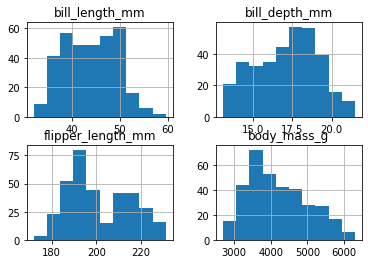

In [ ]:
# пандас так же умеет в простую визуализацию.
df.hist()

## 2.2 Pandas Profiling

На самом деле существует более удобный способ посмотреть на табличные данные, с помощью pandas profiling. Это просто инструмент, который позволит "посмотреть" на данные.

Важно: он медленный и кушает много памяти, поэтому не стоит запихивать в него большие датафреймы.

In [ ]:
import pandas_profiling as prof

df = df.dropna()
df = df[df.sex != '.']
prof.ProfileReport(df, title="Pandas Profiling Report")

## 2.3 Индексация и все такое

Как и numpy, pd.DataFrame поддерживает индексацию (по столбцам и колонкам), а так же булеву индексацию.

Чтобы обратиться к какой-то строке по её индексу (из df.index), нужно использовать `loc`. Так же можно обращаться к строке по её порядковому номеру, используя `iloc`.

Так же как и в numpy, у датафреймов есть view. Обращение по индексу возвращает view.

ВАЖНО:
* `loc[a:b]` вернет view всех элементов с индексами с a до b, ВКЛЮЧАЯ b
* `iloc[a:b]` вернет view всех элементов на позиция с а до b, НЕ ВКЛЮЧАЯ b.


На самом деле, можно не использовать iloc для обращения к строкам, а простую индексацию (`df[2:5]`).

ВАЖНО:
* `df[3]` - обращение к столбцу с именем 3.
* `df[[3,4]]` - обращение к столбцам с именами 3 и 4.
* `df[3:5]` - обращение к элементам с порядковым номером 3 и 4.

(да, пандас очень интуитивный)

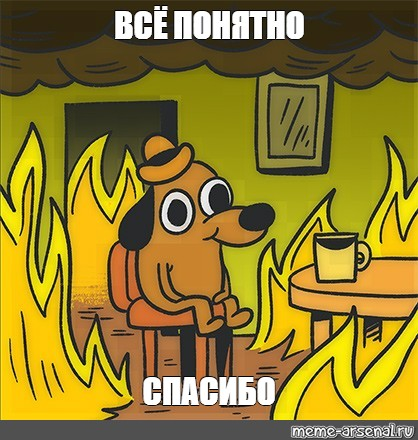

In [ ]:
# обращение по индексу
df.loc[0:2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [ ]:
# обращение по порядковому номеру
df.iloc[0:2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [ ]:
df[0:2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


С помощью `iloc` можно делать слайсы колонок тоже. Первый range или число будут отвечать за строки, второй - за колонки.

In [ ]:
df.iloc[0:2, :]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [ ]:
df.iloc[0:2, 0:3]

,species,island,bill_length_mm
0,Adelie,Torgersen,39.1
1,Adelie,Torgersen,39.5


In [ ]:
df.iloc[:, 0]

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
342    Gentoo
343    Gentoo
344    Gentoo
345    Gentoo
346    Gentoo
Name: species, Length: 347, dtype: object

In [ ]:
# можно делать булево индексирование
df[df['sex'] == 'MALE']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
14,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
15,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE
...,...,...,...,...,...,...,...
336,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
338,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
340,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
344,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE


In [ ]:
# для фильтрации удобно использовать метод isin()

df[df['species'].isin(['Gentoo', 'Adelie'])]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
342,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
343,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
344,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
345,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 2.4 Разные полезные вещи

Одна из самых полезных вещей в pandas - это функция `groupby`. Она позволяет по-разному группировать данные.

In [ ]:
# группирует данные по заданной колонке/списку колонок
df.groupby('sex')

In [ ]:
# необходимо дальше применить функцию группировки, чтобы объяснить пандасу, что 
# именно сделать со сгруппированными элементами
df.groupby('sex').sum()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
.,44.5,15.7,217.0,4875.0
FEMALE,7023.1,2745.7,32937.0,643925.0
MALE,7757.9,3021.4,34588.0,769325.0


In [ ]:
df.groupby('sex').count()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,,,
.,1,1,1,1,1,1
FEMALE,167,167,167,167,167,167
MALE,169,169,169,169,169,169


In [ ]:
# вот тут индекс становится, так называемым мульти-индексом. Про это можно подробно прочитать
# в документации, но на курсе вам это вряд ли понадобится
df.groupby(['sex', 'species']).count()

island  bill_length_mm  ...  flipper_length_mm  body_mass_g
sex    species                            ...                                
.      Gentoo          1               1  ...                  1            1
FEMALE Adelie         75              75  ...                 75           75
       Chinstrap      34              34  ...                 34           34
       Gentoo         58              58  ...                 58           58
MALE   Adelie         73              73  ...                 73           73
       Chinstrap      34              34  ...                 34           34
       Gentoo         62              62  ...                 62           62

[7 rows x 5 columns]

`groupby` так же умеет сортировать и дропать наны.

In [ ]:
# еще полезные функции

# конкатенация датафреймов (конкатенирует датафреймы с )
pieces = [df[:3], df[3:4], df[7:]]
pd.concat(pieces)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
...,...,...,...,...,...,...,...
342,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
343,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
344,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
345,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Неплохой [cheat sheep по pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

# 3. Визуализация и все-все-все

Поскольку python один из основых языков для ML и DS, то с визуализацией у него все хорошо. Есть 3 (на самом деле 4) популярные библиотеки для визуализации:
1. Matplotlib - низкоуровневая библиотека. На ней можно визуализировать что угодно, но надо знатно упороться, чтобы научиться ей нормально пользоваться (а еще код для визуализации получается очень жирный, 50-100 строчек там набрать вообще как нефиг делать)
2. Seaborn - вариант для ленивых, на самом деле просто обертка над matplotlib. Красивые и простые графики. Что-то сложное там не построишь, но чаще всего оно и не надо.
3. letsplot - рай для всех адептор R, синтаксис ggplot. Удобно, при этом можно строить много всего довольно сложного. А еще его делает JetBrains, и он есть еще и под Kotlin :)
4. Plotly - довольно сильная библиотека, которая довольно неплохо конкурирует с matplotlib. Тоже не самая простая, но приятнее. Там классно рисовать всякие карты.

In [ ]:
import seaborn as sns

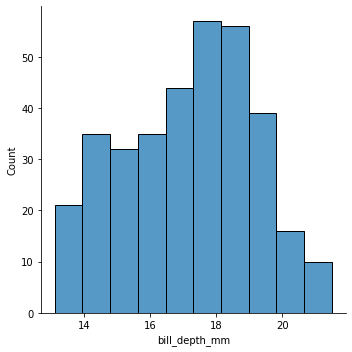

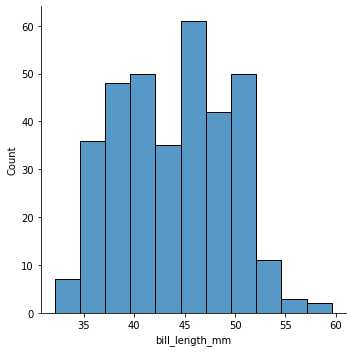

In [ ]:
sns.displot(df['bill_depth_mm'])
sns.displot(df['bill_length_mm'])

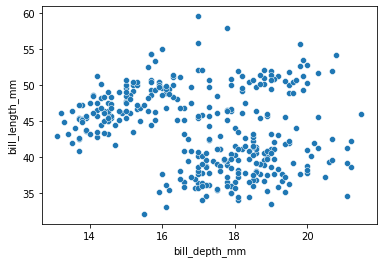

In [ ]:
sns.scatterplot(data=df, x="bill_depth_mm", y="bill_length_mm")

In [ ]:
from lets_plot import *

Тут собран небольшой intro tutorial, которого хватит для построения базовых графиков. 

Чтобы смотреть что-то дальше, советую гуглить ggplot2 tutorial. Там будут туториалы на R (это такой язык программирования для статитики), поскольку изначально ggplot - это библиотека под R, которая оказалась насколько удобной, что её синтаксис используют сейчас в обертках на различные библиотеки визуализации. Синтаксис R очень похож на синтаксис питона, там будут лишь незначительные различия.

[**Читшит по ggplot**](https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Misc/data-visualization-2.1.pdf)

In [ ]:
# в функцию ggplot необходимо подать на вход df с данными, и указать оси, которые использовать в данных aes
# дальше нужно просто прибавлять необходимые функции и все
# так можно задать, например, размер и цвет
ggplot(df, aes(x='bill_depth_mm', y='bill_length_mm')) + geom_point() + ggsize(500, 300)

In [ ]:
# можно изменить цвет линии и цвет заполнения
ggplot(df, aes(x='bill_depth_mm'))+ geom_histogram(color="darkblue", fill="lightblue")

In [ ]:
# можно сгруппировать по классам
p = ggplot(df, aes(x='bill_depth_mm', color='sex'))+ geom_histogram(fill="white")
p.show() 

In [ ]:
# или так
# в aes нужно всего лишь написать, какой именно агрумент зависит от чего
# alpha позволяет делать полупрозрачное заполнение
p = ggplot(df, aes(x='bill_depth_mm', fill='sex'))+ geom_histogram(color="white", alpha=.7)
p.show() 

In [ ]:
# с помощью theme можно настраивать названия осей, положение легенды
ggplot(df, aes(x='bill_depth_mm', fill='sex'))+ geom_histogram(color="white", alpha=.7) + theme(legend_position='top') 

In [ ]:
# можно изменить цвета, которые будут ипользоваться для заполнения
# чтобы сделать то же самое для аргумента color, нужно использовать функцию scale_color_manual()
ggplot(df, aes(x='bill_depth_mm', fill='sex'))+ geom_histogram(color="white", alpha=.7) + theme(legend_position='top') +scale_fill_manual(values=["#999999", "#E69F00", "#56B4E9"])

In [ ]:
# facet_grip позволяет разбивать график на подграфики, выделяя подгруппы

# можно делить по 1 оси
ggplot(df, aes(x='bill_depth_mm'))+ geom_histogram(color="white", alpha=.7) + facet_grid(x='sex')

In [ ]:
# так и по двум 
ggplot(df, aes(x='bill_depth_mm'))+ geom_histogram(color="white", alpha=.7) + facet_grid(x='sex', y='species')